メモ<hr/>
llm 因果推論の関係[ https://www.itmedia.co.jp/news/articles/2306/23/news047.html ]<br>時系列データの異常検知にLLMを使用する手法と実行プロンプト[ https://ai-data-base.com/archives/69867 ]

[参考資料1](https://www.salesanalytics.co.jp/datascience/datascience230/)<br>[参考資料2](https://matheusfacure.github.io/python-causality-handbook/04-Graphical-Causal-Models.html)

In [ ]:
# ① causalgraphicalmodels をアンインストール
!pip uninstall -y causalgraphicalmodels

# ② GitHubからclone
!git clone https://github.com/ijmbarr/causalgraphicalmodels.git

# ③ Iterableの問題を自動で修正（collections → collections.abc）
!sed -i 's/from collections import Iterable/from collections.abc import Iterable/g' causalgraphicalmodels/causalgraphicalmodels/*.py

# ④ 修正済みのライブラリをインストール
!pip install ./causalgraphicalmodels


Found existing installation: causalgraphicalmodels 0.0.4
Uninstalling causalgraphicalmodels-0.0.4:
  Successfully uninstalled causalgraphicalmodels-0.0.4
Cloning into 'causalgraphicalmodels'...
remote: Enumerating objects: 36, done.
remote: Total 36 (delta 0), reused 0 (delta 0), pack-reused 36 (from 1)
Receiving objects: 100% (36/36), 84.55 KiB | 16.91 MiB/s, done.
Resolving deltas: 100% (10/10), done.
Processing ./causalgraphicalmodels
  Preparing metadata (setup.py) ... done
  Created wheel for causalgraphicalmodels: filename=causalgraphicalmodels-0.0.4-py3-none-any.whl size=10469 sha256=fb112c69588b9f3e5d21dbdb11287b965b151a752d5b72837c4573f8454fce4a
  Stored in directory: /tmp/pip-ephem-wheel-cache-k53puqpg/wheels/b0/07/0f/b95d166f72cc188221cc9108075f6562c23bb6e771519e6a6c
Successfully built causalgraphicalmodels


In [ ]:
!pip show causalgraphicalmodels

Name: causalgraphicalmodels
Version: 0.0.4
Summary: Causality Graphical Models in Python
Home-page: https://github.com/ijmbarr/causalgraphicalmodels
Author: Iain Barr
Author-email: iain@degeneratestate.org
License: MIT
Location: /usr/local/lib/python3.11/dist-packages
Requires: graphviz, networkx, numpy, pandas
Required-by: 


In [ ]:
from causalgraphicalmodels.cgm import CausalGraphicalModel
from causalgraphicalmodels.csm import StructuralCausalModel
import causalgraphicalmodels.examples as examples
import causalgraphicalmodels.csm as csm

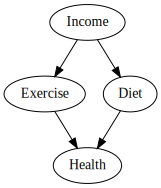

In [ ]:
# DAGの定義
dag = CausalGraphicalModel(
    nodes=["Exercise", "Diet", "Income", "Health"],
    edges=[
        ("Income", "Diet"),
        ("Income", "Exercise"),
        ("Diet", "Health"),
        ("Exercise", "Health")
    ]
)
# DAGの可視化
dag.draw()

# d-分離の理論的な概念と検証方法<br>
**d-分離（d-separation）**は、DAG内のノード間の独立性を判定するための方法です。2つのノードAとBが、ある条件付きで独立しているかどうかを確認します。

これにより、交絡因子やバックドア基準などの条件付き独立性を確認でき、より正確な因果関係の分析が可能です。

d-分離と関連した概念には、以下のものがあります。

**バックドアパス（Backdoor Path）と交絡因子**<br>
AとBの間の経路に交絡因子が介在している場合のパス。交絡因子を条件に含めることでAとBをd-分離できる可能性があります。

**フォワードパス（Forward Path）と中間因子**<br>
AからBへの直接または間接の経路。途中に第三のノードがない場合はd-分離されません。AからBへの間接の経路には中間因子があります。

**衝突因子（Collider）**<br>
共通の結果に影響を与えるノード。A → C ← Bのような構造では、Cを条件に含めることでAとBの間に依存性が生じ、d-分離されません。

## バックドアパス（Backdoor Path）と交絡因子

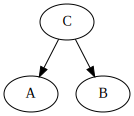

In [ ]:
# DAG構造の定義
dag = CausalGraphicalModel(
    nodes=["A", "B", "C"],
    edges=[("C", "A"), ("C", "B")]
)
# DAGの可視化
dag.draw()

In [ ]:
# Cを条件にしたとき、AとBがd-分離されるか確認
is_d_sep = dag.is_d_separated("A", "B", {"C"})
print(f"AとBはCを条件にするとd-分離されるか: {is_d_sep}")

#Cを条件にすることで、AとBの間にある交絡因子Cの影響が排除され、
#AとBがd-分離されます。

#したがって、Cは交絡因子であり、その影響を取り除くことでAとBの
#直接的な関係が正確に評価できます。

AとBはCを条件にするとd-分離されるか: True


## フォワードパス（Forward Path）と中間因子

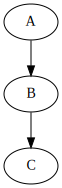

In [ ]:
# フォワードパスのDAG
dag = CausalGraphicalModel(
    nodes=["A", "B", "C"],
    edges=[("A", "B"), ("B", "C")]
)
# DAGの可視化
dag.draw()

In [ ]:
# Bを条件にしたとき、AとCがd-分離されるか確認
is_d_sep = dag.is_d_separated("A", "C", {"B"})
print(f"AとCはBを条件にするとd-分離されるか: {is_d_sep}")

AとCはBを条件にするとd-分離されるか: True


## 衝突因子（Collider）

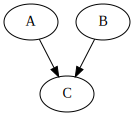

In [ ]:
# 衝突因子のDAG
dag = CausalGraphicalModel(
    nodes=["A", "B", "C"],
    edges=[("A", "C"), ("B", "C")]
)
# DAGの可視化
dag.draw()

In [ ]:
# Cを条件にしたとき、AとBがd-分離されるか確認
is_d_sep = dag.is_d_separated("A", "B", {"C"})
print(f"AとBはCを条件にするとd-分離されるか: {is_d_sep}")

#衝突因子に条件付けしないことで、
#もともと独立していたノード同士の相関を避けることができます。

AとBはCを条件にするとd-分離されるか: False


# do-演算とシミュレーション

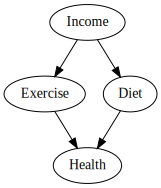

In [ ]:
# DAGの定義
dag = CausalGraphicalModel(
    nodes=["Diet", "Exercise", "Income", "Health"],
    edges=[
        ("Income", "Diet"),
        ("Income", "Exercise"),
        ("Diet", "Health"),
        ("Exercise", "Health")
    ]
)
# DAGの可視化
dag.draw()

In [ ]:
import pandas as pd
df = pd.read_csv('/dag_data.csv')
print(df)

           Diet    Exercise    Income       Health
0     1_Average  1_Moderate  1_Medium       2_Good
1        2_Good      2_High    2_High  3_Excellent
2        2_Good      2_High    2_High  3_Excellent
3     1_Average  1_Moderate  1_Medium       2_Good
4        0_Poor      0_None     0_Low       0_Poor
...         ...         ...       ...          ...
1480     2_Good      0_None     0_Low       2_Good
1481     2_Good      0_None    2_High  3_Excellent
1482     2_Good      2_High  1_Medium  3_Excellent
1483     2_Good      0_None    2_High    1_Average
1484  1_Average  1_Moderate    2_High  3_Excellent

[1485 rows x 4 columns]


In [ ]:
#カテゴリカルデータのエンコーディング

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# ラベルエンコーディング
le_diet = LabelEncoder()
le_exercise = LabelEncoder()
le_income = LabelEncoder()
le_health = LabelEncoder()
# 各変数にラベルエンコーディングを適用
encoded_diet = le_diet.fit_transform(df['Diet'])
encoded_exercise = le_exercise.fit_transform(df['Exercise'])
encoded_income = le_income.fit_transform(df['Income'])
encoded_health = le_health.fit_transform(df['Health'])
# ワンホットエンコーディング
encoder = OneHotEncoder()
df_encoded = encoder.fit_transform(df[['Diet', 'Exercise', 'Income', 'Health']]).toarray()
# ラベルエンコーディングの結果をDataFrameに格納
encoded_df = pd.DataFrame({
    'Diet': encoded_diet,
    'Exercise': encoded_exercise,
    'Income': encoded_income,
    'Health': encoded_health
})
# ワンホットエンコーディングの結果をDataFrameに格納
onehot_encoded_df = pd.DataFrame(df_encoded, columns=encoder.get_feature_names_out())
# 全てを１つのデータフレームに統合
final_df = pd.concat([encoded_df, onehot_encoded_df], axis=1)
print(final_df)

      Diet  Exercise  Income  Health  Diet_0_Poor  Diet_1_Average  \
0        1         1       1       2          0.0             1.0   
1        2         2       2       3          0.0             0.0   
2        2         2       2       3          0.0             0.0   
3        1         1       1       2          0.0             1.0   
4        0         0       0       0          1.0             0.0   
...    ...       ...     ...     ...          ...             ...   
1480     2         0       0       2          0.0             0.0   
1481     2         0       2       3          0.0             0.0   
1482     2         2       1       3          0.0             0.0   
1483     2         0       2       1          0.0             0.0   
1484     1         1       2       3          0.0             1.0   

      Diet_2_Good  Exercise_0_None  Exercise_1_Moderate  Exercise_2_High  \
0             0.0              0.0                  1.0              0.0   
1             1.0  

In [ ]:
# Dietのマッピング
diet_mapping = dict(
    zip(le_diet.classes_,
        le_diet.transform(le_diet.classes_)
    ) )
# Exerciseのマッピング
exercise_mapping = dict(
    zip(le_exercise.classes_,
        le_exercise.transform(le_exercise.classes_)
    ) )
# Incomeのマッピング
income_mapping = dict(
    zip(le_income.classes_,
        le_income.transform(le_income.classes_)
    ) )
# Healthのマッピング
health_mapping = dict(
    zip(le_health.classes_,
        le_health.transform(le_health.classes_)
    ) )
# マッピングの表示
print("Dietマッピング:", diet_mapping)
print("Exerciseマッピング:", exercise_mapping)
print("Incomeマッピング:", income_mapping)
print("Healthマッピング:", health_mapping)

Dietマッピング: {'0_Poor': np.int64(0), '1_Average': np.int64(1), '2_Good': np.int64(2)}
Exerciseマッピング: {'0_None': np.int64(0), '1_Moderate': np.int64(1), '2_High': np.int64(2)}
Incomeマッピング: {'0_Low': np.int64(0), '1_Medium': np.int64(1), '2_High': np.int64(2)}
Healthマッピング: {'0_Poor': np.int64(0), '1_Average': np.int64(1), '2_Good': np.int64(2), '3_Excellent': np.int64(3)}


In [ ]:
#3つの多項ロジスティック回帰モデルを構築

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# モデルのインスタンスの作成
model_diet = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model_exercise = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model_health = LogisticRegression(multi_class='multinomial', solver='lbfgs')
#
# モデルの学習
#
# Dietモデル
# 目的変数：Diet、説明変数：Incomeのワンホットコードした変数
model_diet.fit(
    final_df[['Income_0_Low', 'Income_1_Medium', 'Income_2_High']],
    final_df['Diet'])
# 正答率（accuracy）の計算
predicted_diet = model_diet.predict(
    final_df[['Income_0_Low', 'Income_1_Medium', 'Income_2_High']])
accuracy_diet = accuracy_score(final_df['Diet'], predicted_diet)
print(f'Diet model accuracy: {accuracy_diet}')
# Exerciseモデル
# 目的変数：Exercise、説明変数：Incomeのワンホットコードした変数
model_exercise.fit(
    final_df[['Income_0_Low', 'Income_1_Medium', 'Income_2_High']],
    final_df['Exercise'])
# 正答率（accuracy）の計算
predicted_exercise = model_exercise.predict(
    final_df[['Income_0_Low', 'Income_1_Medium', 'Income_2_High']])
accuracy_exercise = accuracy_score(final_df['Exercise'], predicted_exercise)
print(f'Exercise model accuracy: {accuracy_exercise}')
# Healthモデル
# 目的変数：Health、説明変数：DietとExerciseのワンホットコードした変数
model_health.fit(
    final_df[['Diet_0_Poor', 'Diet_1_Average', 'Diet_2_Good',
              'Exercise_0_None', 'Exercise_1_Moderate', 'Exercise_2_High']],
    final_df['Health'])
# 正答率（accuracy）の計算
predicted_health = model_health.predict(
    final_df[['Diet_0_Poor', 'Diet_1_Average', 'Diet_2_Good',
              'Exercise_0_None', 'Exercise_1_Moderate', 'Exercise_2_High']])
accuracy_health = accuracy_score(final_df['Health'], predicted_health)
print(f'Health model accuracy: {accuracy_health}')

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Diet model accuracy: 0.7845117845117845
Exercise model accuracy: 0.7831649831649832
Health model accuracy: 0.7575757575757576


## 介入シミュレーション（do-演算）

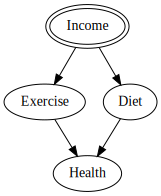

In [ ]:
#因果関係の分析において特定の変数に強制的に介入し、その結果を観察する手法

# 介入（do-演算）によるDAGの作成（Incomeに介入）
do_dag = dag.do("Income")
do_dag.draw()

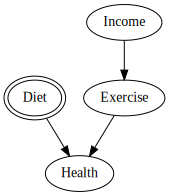

In [ ]:
# 介入（do-演算）によるDAGの作成（Dietに介入）
do_dag = dag.do("Diet")
do_dag.draw()

#Diet（食事）は収入（Income）の影響を受けなくなる

In [ ]:
#Income（収入）を高く設定した場合の、Diet（食事）とExercise（運動習慣）を予測
import pandas as pd
# IncomeがHighの場合の入力データ
input_data_income_high = pd.DataFrame(
    {
       'Income_0_Low': [0],
       'Income_1_Medium': [0],
       'Income_2_High': [1]
    }
)
# DietとExerciseの予測確率を計算
predicted_diet_probs = model_diet.predict_proba(input_data_income_high)
predicted_exercise_probs = model_exercise.predict_proba(input_data_income_high)
# 結果をデータフレームにまとめる
predicted_probs_df = pd.DataFrame(
    {
        'Diet_0_Poor': predicted_diet_probs[0][0],
        'Diet_1_Average': predicted_diet_probs[0][1],
        'Diet_2_Good': predicted_diet_probs[0][2],
        'Exercise_0_None': predicted_exercise_probs[0][0],
        'Exercise_1_Moderate': predicted_exercise_probs[0][1],
        'Exercise_2_High': predicted_exercise_probs[0][2]
    }, index=[0]
)
# 結果のデータフレームを表示
print(predicted_probs_df.T)

                            0
Diet_0_Poor          0.102096
Diet_1_Average       0.109911
Diet_2_Good          0.787993
Exercise_0_None      0.110096
Exercise_1_Moderate  0.116497
Exercise_2_High      0.773407


In [ ]:
# IncomeがHighの場合のDietとExerciseの予測確率を使用して、健康状態の予測
predicted_health_probs = model_health.predict_proba(predicted_probs_df)
# 結果をデータフレームに格納
predicted_health_probs_df = pd.DataFrame(
    predicted_health_probs,
    columns=[
        'Health_0_Poor',
        'Health_1_Average',
        'Health_2_Good',
        'Health_3_Excellent'
    ]
)
# 結果のデータフレームを表示
print(predicted_health_probs_df.T)

                           0
Health_0_Poor       0.104668
Health_1_Average    0.103033
Health_2_Good       0.078269
Health_3_Excellent  0.714030


In [ ]:
# 元データの健康状態の分布を計算
df_health_distribution_original = df['Health'].value_counts(normalize=True)
df_health_distribution_original.columns = ['Original']
# Healthの分布のインデックスを統一するために列名を修正して再度結果をまとめる
health_distributions_intervened = predicted_health_probs_df.rename(
    columns={
        'Health_0_Poor': '0_Poor',
        'Health_1_Average': '1_Average',
        'Health_2_Good': '2_Good',
        'Health_3_Excellent': '3_Excellent'
    }).T
# 元データのHealthの分布と介入後の分布を結合
health_distribution_comparison = pd.concat(
    [df_health_distribution_original, health_distributions_intervened],
    axis=1)
health_distribution_comparison.columns = ['Original', 'Intervened']
print(health_distribution_comparison.sort_index())

             Original  Intervened
0_Poor       0.317172    0.104668
1_Average    0.078114    0.103033
2_Good       0.298316    0.078269
3_Excellent  0.306397    0.714030


In [ ]:
#所得レベルが「高」にした影響
#1.食生活と運動の質に顕著な影響
#2.Diet_2_Goodの確率が約78.8%、Exercise_2_Highの確率が約77.4%に上昇
#3.所得が高いと健康的な食生活と運動習慣が向上することを示唆

#健康状態への影響

#所得の健康への影響
#所得が健康に直接的な影響を与えることを示した

#公衆衛生政策への示唆

# 教科書

In [ ]:
!pip install ylearn==0.2.0
!pip install networkx==2.8.8

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 61.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 55.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 95.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 75.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
 

In [ ]:
from ylearn.causal_model.graph import CausalGraph
from ylearn.causal_model.model import CausalModel

causation = {
    'X1': [],
    'X2': [],
    'X3': ['X1'],
    'X4': ['X1', 'X2'],
    'X5': ['X2'],
    'X6': ['X','X1', 'X2'],
    'X': ['X3', 'X4', 'X5'],
    'Y': ['X3', 'X4', 'X5', 'X6', 'X'],
}

cg = CausalGraph(causation=causation)
cm = CausalModel(causal_graph=cg)
backdoor_set, prob = cm.identify(treatment={'X'}, outcome={'Y'}, identify_method=('backdoor', 'simple'))['backdoor']

print(backdoor_set)

['X3', 'X4', 'X5']


In [ ]:
##### 以下、グラフの可視化用コード ####

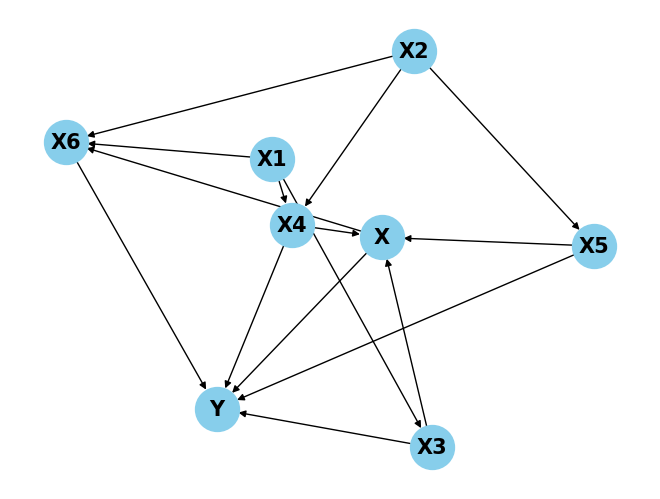

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Create directed graph
G = nx.DiGraph()

# Add nodes
for node in causation.keys():
    G.add_node(node)

# Add edges based on causation
for target, sources in causation.items():
    for source in sources:
        G.add_edge(source, target)

# Draw the graph
pos = nx.spring_layout(G, seed=42)
labels = {node: node for node in G.nodes()}
nx.draw(G, pos, labels=labels, with_labels=True, node_color='skyblue', font_weight='bold', node_size=1000, font_size=15)
plt.show()